## Problem Statement

Pakistan’s economy depends heavily on agriculture, which is directly affected by climate. Rainfall is one of the biggest drivers of climate.
By understanding rainfall patterns, we can better plan for agriculture, disaster management, and urban water supply systems.
Let’s analyze the rainfall trends using the dataset provided.

## Step 1: Load Data & Start EDA

In [53]:
import pandas as pd
df=pd.read_csv('rainfall_1901_2016_pak.csv')
df.head()

,Rainfall - (MM),Year,Month
0,40.4258,1901,January
1,12.3022,1901,February
2,25.5119,1901,March
3,14.2942,1901,April
4,38.3046,1901,May


## Step 2: Check for Missing Values

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rainfall - (MM)  1392 non-null   float64
 1   Year             1392 non-null   int64  
 2   Month            1392 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 32.8+ KB


There is no single record/value found with null value

In [58]:
df.isnull().sum()

Rainfall - (MM)    0
 Year              0
Month              0
dtype: int64

## Step 3: check number of rows and columns i.e. Data Shape

In [55]:
df.shape

(1392, 3)

## Step 3: Statistical analysis

In [97]:
df.describe()

,Rainfall - (MM),Year
count,1392.000000,1392.000000
mean,25.142392,1958.500000
std,22.239632,33.497105
min,0.105840,1901.000000
25%,9.586635,1929.750000
50%,19.653750,1958.500000
75%,33.753075,1987.250000
max,154.055000,2016.000000


# Average Monthly Rainfall in Pakistan (1901–2016)

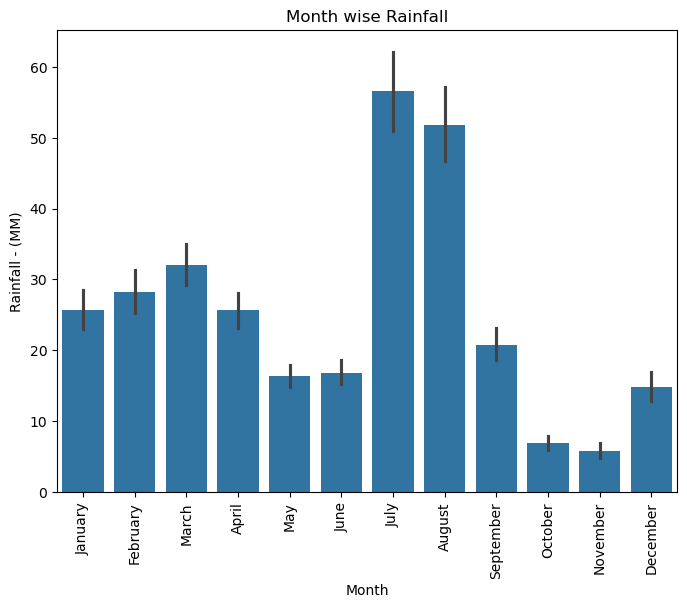

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x='Month',y='Rainfall - (MM)',data=df)
plt.title("Month wise Rainfall")
plt.xlabel("Month")
plt.ylabel("Rainfall - (MM)")
plt.xticks(rotation=90)
plt.show()

So, Maximum Rainfall occurs in the month of July & Agust i.e. Summer & Moonsoon :)

# Season-wise Rainfall Distribution Over 115 Years

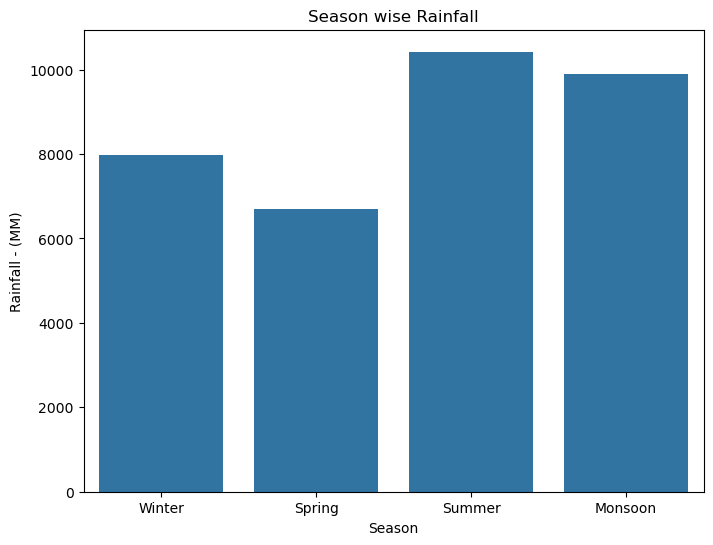

In [66]:
# Define month to season mapping
season_map = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring',
    'May': 'Summer', 'June': 'Summer', 'July': 'Summer',
    'August': 'Monsoon', 'September': 'Monsoon',
    'October': 'Monsoon', 'November': 'Monsoon'
}
# Create a new DataFrame with season information
df_seasonal = df.copy()
df_seasonal['Season'] = df_seasonal['Month'].map(season_map)
df_seasonal.head()

# Group by season
seasonal_rainfall = df_seasonal.groupby('Season')['Rainfall - (MM)'].sum().reset_index()
seasonal_rainfall.head()

# Optional: sort by logical season order
season_order = ['Winter', 'Spring', 'Summer', 'Monsoon']
seasonal_rainfall['Season'] = pd.Categorical(seasonal_rainfall['Season'], categories=season_order, ordered=True)
seasonal_rainfall = seasonal_rainfall.sort_values('Season')
seasonal_rainfall.head()

plt.figure(figsize=(8,6))
sns.barplot(x='Season',y='Rainfall - (MM)',data=seasonal_rainfall)
plt.title("Season wise Rainfall")
plt.xlabel("Season")
plt.ylabel("Rainfall - (MM)")
plt.show()

I was expecting more rainfall in Moonsoon but it is in Summer :) This is the beauty of data analysis.

# Assessing the Impact of Climate Change on Rainfall in Pakistan

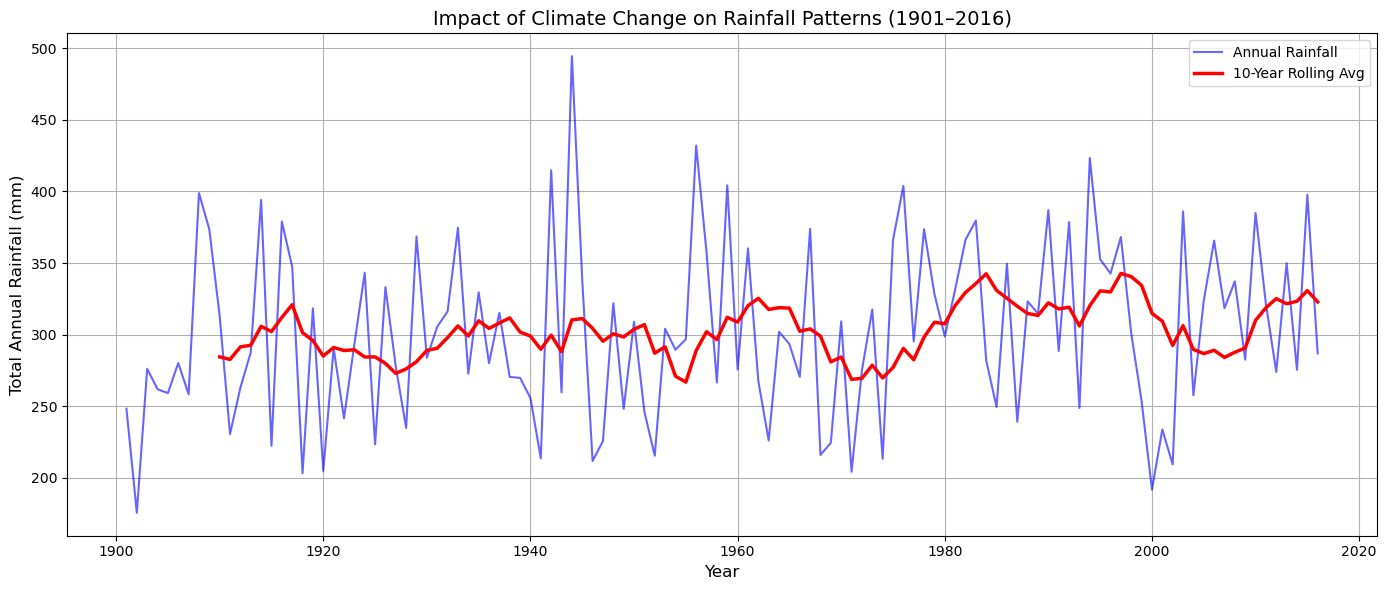

In [102]:
# Step 1: Calculate annual rainfall
annual_rainfall = df.groupby('Year')['Rainfall - (MM)'].sum().reset_index()
annual_rainfall.rename(columns={'Rainfall - (MM)': 'Annual'}, inplace=True)

# Step 2: Compute 10-year rolling average
annual_rainfall['10-Year Rolling Avg'] = annual_rainfall['Annual'].rolling(window=10).mean()

# Step 3: Plot using matplotlib and seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=annual_rainfall, x='Year', y='Annual', label='Annual Rainfall', color='blue', alpha=0.6)
sns.lineplot(data=annual_rainfall, x='Year', y='10-Year Rolling Avg', label='10-Year Rolling Avg', color='red', linewidth=2.5)

# Step 4: Customize the plot
plt.title('Impact of Climate Change on Rainfall Patterns (1901–2016)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Annual Rainfall (mm)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Step 5: Show plot
plt.show()


Each year’s rainfall goes up and down a lot, which is normal. But when we look at the red line (the 10-year average), we see the bigger picture. Rainfall stayed mostly steady for many decades. In the 1990s and early 2000s, there was a clear drop, which might be linked to climate change or changing weather patterns. In recent years, rainfall started to rise again a bit. So overall, while yearly rainfall changes a lot, long-term patterns do suggest that the climate may be affecting rainfall over time.

# Conclusion

In this analysis, we explored over a century of rainfall data for Pakistan (1901–2016) to identify long-term trends and seasonal patterns.

Our findings show that while annual rainfall fluctuates significantly year to year, the 10-year rolling average reveals noticeable changes over time.
Monsoon and summer season consistently receives the highest rainfall, especially in July and August.

A decline in rainfall during the late 1990s and early 2000s may suggest the beginning of climate-related impacts.

Overall, this analysis highlights the importance of monitoring climate trends to support agricultural planning, water resource management, and disaster preparedness in Pakistan.